In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from umap import UMAP
import umap.plot as uplot
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [242]:
import pandas as pd
import sys; sys.path.insert(0, '..')
from stattest import Analysis
# from clustering import ClusteringPipe

df = pd.read_csv('data_processed.csv')
Class, User = pd.Categorical(df.Class),  pd.Categorical(df.User)
y = pd.DataFrame({'class':Class.codes, 'user':User.codes})
X = df.drop([ 'Class', 'User'], axis=1)
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X.iloc[:,:21])
X_std = StandardScaler().fit_transform(X.iloc[:,:21])

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,"d(2,3)","d(2,4)","d(2,5)","d(2,6)","d(3,4)","d(3,5)","d(3,6)","d(4,5)","d(4,6)","d(5,6)"
0,-8.227155,73.643256,-37.593100,65.174182,57.515534,-84.994105,6.969503,75.407770,-53.048813,66.946320,...,81.876708,25.331211,97.015330,52.380298,63.285340,40.263912,38.005912,86.944742,28.729514,70.039191
1,69.099339,31.773566,-86.584150,53.137980,64.278846,-72.201722,33.123296,75.942202,-59.243012,6.089391,...,27.515499,48.018317,45.439130,86.379039,22.698308,69.770357,97.363940,90.376184,109.176006,64.086634
2,6.046735,75.438610,-53.040008,70.369971,33.829650,-85.794384,51.278509,65.584169,-73.209932,32.444551,...,26.797445,71.740871,18.363175,70.161106,47.922172,45.114226,87.049601,89.383091,110.000487,64.337720
3,66.660819,32.071679,-87.412999,7.247465,74.958259,-52.868057,71.720225,58.106231,-84.699351,-7.004525,...,93.312607,24.285412,49.715727,65.945781,69.367690,45.996584,107.360969,25.815775,70.095985,86.120138
4,-11.878380,73.273837,-39.057554,7.022866,74.702456,-53.124234,50.765430,64.569877,-74.137498,69.225936,...,40.187156,70.365876,23.760776,25.549196,40.428827,26.172231,63.435095,65.114314,86.201082,49.133886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13190,26.360263,104.641786,9.999255,-32.777731,70.987137,-11.688445,22.914035,145.552899,-23.998272,-14.042776,...,44.313142,115.097449,58.847396,37.226445,128.816917,56.140820,74.971457,117.329544,91.655285,81.621590
13191,-25.878514,129.877553,16.302754,14.159244,149.406613,3.361332,59.813704,98.707090,-48.241956,50.638677,...,40.652462,67.249563,96.550031,70.646246,29.250712,65.165563,62.052316,38.522604,69.990308,86.035634
13192,6.310556,133.268092,-44.430685,43.433096,105.813522,11.658775,12.301988,105.808711,5.645446,-4.513746,...,22.589854,51.471680,61.440863,49.718827,29.454416,46.530097,51.685115,40.426839,64.940455,42.127460
13193,9.642401,104.403391,5.198331,-18.247441,85.949909,-26.115346,40.264286,148.037266,-32.146091,77.336511,...,67.311887,33.931411,75.413480,47.365219,84.471563,107.977040,50.029835,43.442338,69.775369,97.469953


In [49]:
def present_results(results):
    print('Mean:')
    print(results.mean())
    print('Annova:')
    print(results.annova())
    print('Scheffe:')
    print(results.scheffe())
    return results.plot()

## DImension Reduction Methods

In [219]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

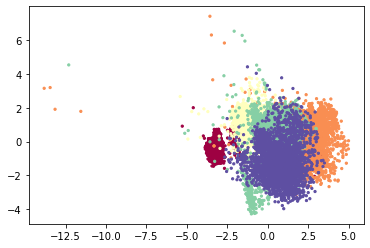

In [259]:
X_lda = LDA().fit_transform(X_std, Class)
plt.scatter(X_lda[:,0], X_lda[:,1], c=Class, cmap='Spectral', s=5)

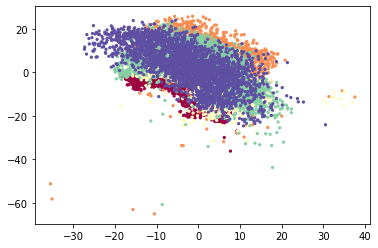

In [257]:
X_nca = NCA().fit_transform(X_std, Class)
plt.scatter(X_nca[:,0], X_nca[:,1], c=Class, cmap='Spectral', s=5)

In [253]:
# project the 64-dimensional data to a lower dimension
umap = UMAP(n_components=5, n_neighbors=50, min_dist=0.4, negative_sample_rate=2, spread=0.5)
X_umap = umap.fit_transform(X)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

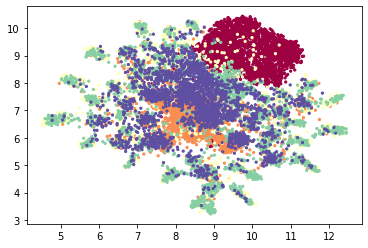

In [274]:
X_umap_2d = UMAP(n_neighbors=50, min_dist=0.4, negative_sample_rate=2, spread=0.5).fit_transform(X)
plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=Class, cmap='Spectral', s=5)

In [98]:
def visualize2d(data, labels, dims=[0, 1]):
    d1, d2 = data[:, dims[0]], data[:, dims[1]]
    x_vis = pd.DataFrame({'d1': d1, 'd2':d2, 'label':labels}) 
    x_vis.plot.scatter('d1', 'd2', c='label', colormap='jet')

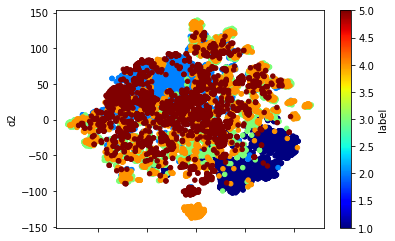

In [279]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=0)
X_tsne_2d = tsne.fit_transform(X_scaled)
visualize2d(X_tsne_2d, Class)

Mean:
pca    -6.061829e+03
umap   -3.013570e+03
non    -2.874662e+09
dtype: float64
Annova:
(104007.69327391409, 1.0569035204347066e-147)
Scheffe:
                pca           umap            non
pca    1.000000e+00   9.999999e-01  2.859288e-142
umap   9.999999e-01   1.000000e+00  2.859025e-142
non   2.859288e-142  2.859025e-142   1.000000e+00


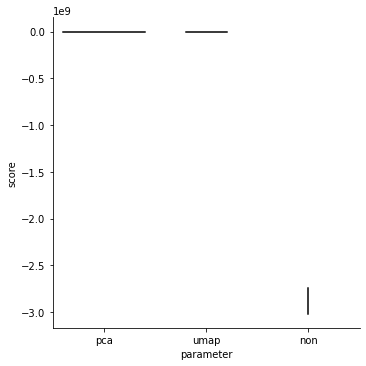

In [273]:
def test_reudction(X_train, X_test, y_train, y_test):
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X_train)
    return kde.score(X_test)
X_reduced = {'umap':X_umap, 'pca':X_umap[:,:2], 'non':X}
present_results(Analysis({reduction:[test_reudction(*train_test_split(X_reduced[reduction], y, test_size=0.25, random_state=i)) for i in range(30)] for reduction in ['pca','umap', 'non']}))

## Kernel Density Estimation

### kernel type

Mean:
gaussian      -2.874662e+09
exponential   -3.131775e+06
dtype: float64
Annova:
(103781.42837560891, 4.823662528705103e-96)
Scheffe:
                 gaussian   exponential
gaussian     1.000000e+00  4.823663e-96
exponential  4.823663e-96  1.000000e+00


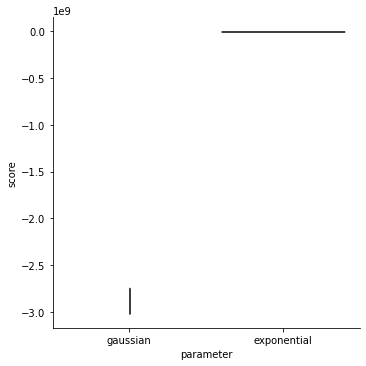

In [264]:
def test_kernel(kernel, X_train, X_test, y_train, y_test):
    kde = KernelDensity(kernel=kernel, bandwidth=0.1).fit(X_train)
    return kde.score(X_test)
present_results(Analysis({arg:[test_kernel(arg, *train_test_split(X, y, test_size=0.25, random_state=i)) for i in range(30)] for arg in ['gaussian', 'exponential']}))

### Anomly Detection

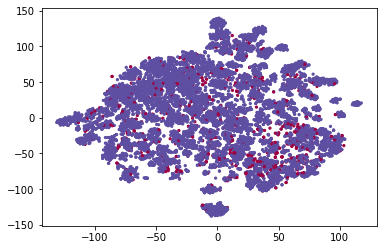

In [292]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X_umap)
scores = kde.score_samples(X_umap)
inlires = scores > np.quantile(scores, 0.05)
#plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=inlires, cmap='Spectral', s=5)
plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=inlires, cmap='Spectral', s=5)

## Gaussian Mixture Model

In [213]:
from sklearn.mixture import GaussianMixture

### No of Gaussians

Mean:
2   -202.889909
3   -198.858952
4   -196.554452
5   -195.059183
6   -193.737743
dtype: float64
Annova:
(1662.8591247131674, 5.198031096176271e-120)
Scheffe:
               2             3             4              5              6
2   1.000000e+00  4.153205e-65  3.583274e-91  6.372643e-104  1.950979e-113
3   4.153205e-65  1.000000e+00  4.632451e-37   7.121415e-62   1.155213e-78
4   3.583274e-91  4.632451e-37  1.000000e+00   8.393868e-21   2.211946e-46
5  6.372643e-104  7.121415e-62  8.393868e-21   1.000000e+00   3.144200e-17
6  1.950979e-113  1.155213e-78  2.211946e-46   3.144200e-17   1.000000e+00


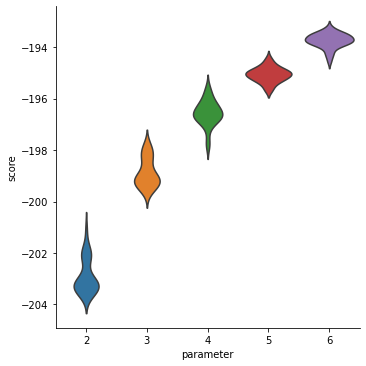

In [214]:
def test_n_gmm(n_components, X_train, X_test, y_train, y_test):
    gmm = GaussianMixture(n_components=n_components, random_state=0).fit(X_train)
    return gmm.score(X_test)
present_results(Analysis({f'{arg}':[test_n_gmm(arg, *train_test_split(X, y, test_size=0.25, random_state=i)) for i in range(30)] for arg in [2,3,4,5,6]}))

Mean:
pca     -26.122022
umap     -4.065899
non    -193.636740
dtype: float64
Annova:
(10752405.599604236, 2.5334420799992326e-235)
Scheffe:
                pca           umap            non
pca    1.000000e+00  1.151885e-150  2.900511e-227
umap  1.151885e-150   1.000000e+00  6.151556e-232
non   2.900511e-227  6.151556e-232   1.000000e+00


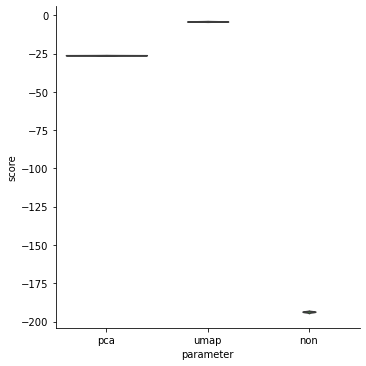

In [271]:
def test_reudction(X_train, X_test, y_train, y_test):
    gmm = GaussianMixture(n_components=6, random_state=0).fit(X_train)
    return gmm.score(X_test)
X_reduced = {'umap':X_umap, 'pca':X_pca, 'non':X}
present_results(Analysis({reduction:[test_reudction(*train_test_split(X_reduced[reduction], y, test_size=0.25, random_state=i)) for i in range(30)] for reduction in ['pca','umap', 'non']}))

Mean:
2   -203.005353
3   -198.860256
4   -196.493353
5   -194.826107
6   -193.636740
dtype: float64
Annova:
(2500.2683646080823, 1.266766609006779e-132)
Scheffe:
               2             3              4              5              6
2   1.000000e+00  1.856651e-76  3.031117e-103  3.583329e-117  1.522194e-125
3   1.856651e-76  1.000000e+00   2.403777e-46   6.699416e-75   5.359819e-90
4  3.031117e-103  2.403777e-46   1.000000e+00   9.073536e-31   6.940938e-56
5  3.583329e-117  6.699416e-75   9.073536e-31   1.000000e+00   3.915441e-19
6  1.522194e-125  5.359819e-90   6.940938e-56   3.915441e-19   1.000000e+00


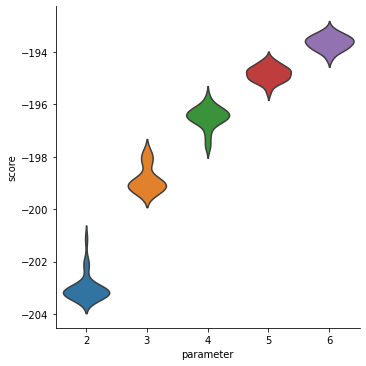

In [299]:
def test_n_gmm(n_components, X_train, X_test, y_train, y_test):
    gmm = GaussianMixture(n_components=n_components, random_state=0).fit(X_train)
    return gmm.score(X_test)
present_results(Analysis({f'{arg}':[test_n_gmm(arg, *train_test_split(X, y, test_size=0.25, random_state=i)) for i in range(30)] for arg in [2,3,4,5,6]}))

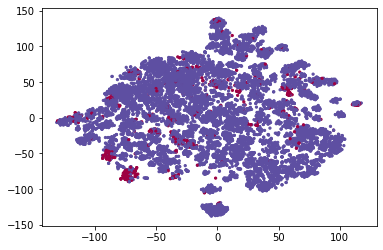

In [291]:
gmm = GaussianMixture(n_components=6, random_state=0).fit(X_umap)
scores = gmm.score_samples(X_umap)
inlires = scores > np.quantile(scores, 0.05)
#plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=inlires, cmap='Spectral', s=5)
plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=inlires, cmap='Spectral', s=5)

In [217]:
from sklearn.covariance import EllipticEnvelope

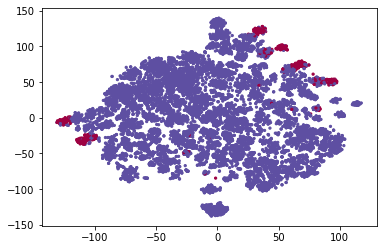

In [290]:
ee = EllipticEnvelope(random_state=0).fit(X_umap)
scores = ee.score_samples(X_umap)
inlires = scores > np.quantile(scores, 0.05)
#plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=inlires, cmap='Spectral', s=5)
plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=inlires, cmap='Spectral', s=5)

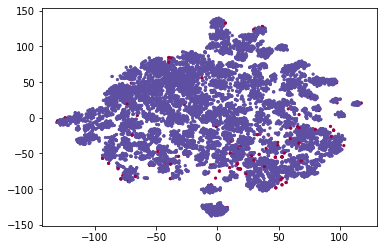

In [293]:
from sklearn.neighbors import LocalOutlierFactor
labels = LocalOutlierFactor().fit_predict(X_std)
inlires = labels != -1
plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=inlires, cmap='Spectral', s=5)

In [313]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_umap)

In [316]:
from mst_clustering import MSTClustering
clusters = MSTClustering(cutoff=0.8).fit_predict(X_umap)

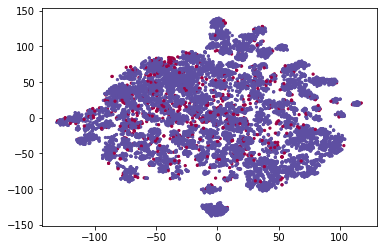

In [300]:
plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=clusters >= 0, cmap='Spectral', s=5)

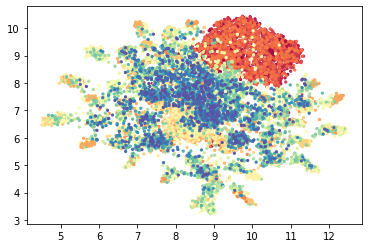

In [317]:
#best silehoutte clusters
from mst_clustering import MSTClustering
clusters = MSTClustering(cutoff=0.8).fit_predict(X_umap)
plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=clusters, cmap='Spectral', s=5)

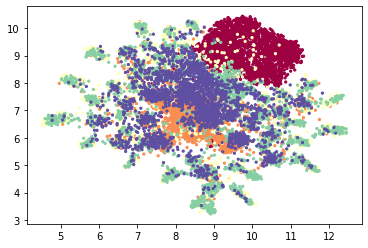

In [318]:
#real classes
plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=Class, cmap='Spectral', s=5)

In [ ]:
#best V score clusters 

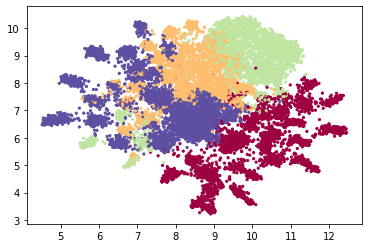

In [346]:
clusters = GaussianMixture(n_components=4, covariance_type='tied', random_state=11).fit_predict(X_umap)
plt.scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=clusters, cmap='Spectral', s=5)

In [348]:
X

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,"d(2,3)","d(2,4)","d(2,5)","d(2,6)","d(3,4)","d(3,5)","d(3,6)","d(4,5)","d(4,6)","d(5,6)"
0,-8.227155,73.643256,-37.593100,65.174182,57.515534,-84.994105,6.969503,75.407770,-53.048813,66.946320,...,81.876708,25.331211,97.015330,52.380298,63.285340,40.263912,38.005912,86.944742,28.729514,70.039191
1,69.099339,31.773566,-86.584150,53.137980,64.278846,-72.201722,33.123296,75.942202,-59.243012,6.089391,...,27.515499,48.018317,45.439130,86.379039,22.698308,69.770357,97.363940,90.376184,109.176006,64.086634
2,6.046735,75.438610,-53.040008,70.369971,33.829650,-85.794384,51.278509,65.584169,-73.209932,32.444551,...,26.797445,71.740871,18.363175,70.161106,47.922172,45.114226,87.049601,89.383091,110.000487,64.337720
3,66.660819,32.071679,-87.412999,7.247465,74.958259,-52.868057,71.720225,58.106231,-84.699351,-7.004525,...,93.312607,24.285412,49.715727,65.945781,69.367690,45.996584,107.360969,25.815775,70.095985,86.120138
4,-11.878380,73.273837,-39.057554,7.022866,74.702456,-53.124234,50.765430,64.569877,-74.137498,69.225936,...,40.187156,70.365876,23.760776,25.549196,40.428827,26.172231,63.435095,65.114314,86.201082,49.133886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13190,26.360263,104.641786,9.999255,-32.777731,70.987137,-11.688445,22.914035,145.552899,-23.998272,-14.042776,...,44.313142,115.097449,58.847396,37.226445,128.816917,56.140820,74.971457,117.329544,91.655285,81.621590
13191,-25.878514,129.877553,16.302754,14.159244,149.406613,3.361332,59.813704,98.707090,-48.241956,50.638677,...,40.652462,67.249563,96.550031,70.646246,29.250712,65.165563,62.052316,38.522604,69.990308,86.035634
13192,6.310556,133.268092,-44.430685,43.433096,105.813522,11.658775,12.301988,105.808711,5.645446,-4.513746,...,22.589854,51.471680,61.440863,49.718827,29.454416,46.530097,51.685115,40.426839,64.940455,42.127460
13193,9.642401,104.403391,5.198331,-18.247441,85.949909,-26.115346,40.264286,148.037266,-32.146091,77.336511,...,67.311887,33.931411,75.413480,47.365219,84.471563,107.977040,50.029835,43.442338,69.775369,97.469953


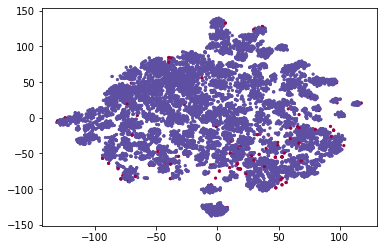

In [349]:
from sklearn.neighbors import LocalOutlierFactor
labels = LocalOutlierFactor().fit_predict(X_std)
inlires = labels != -1
plt.scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], c=inlires, cmap='Spectral', s=5)

In [353]:
outlires = inlires != True

In [357]:
outs = X.iloc[outlires,:21]

In [367]:
def points(row, length=6):
    return pd.DataFrame(np.array((row[f'X{i}'], row[f'Y{i}'], row[f'Z{i}'])) for i in range(length) if not (np.isnan(row[f'X{i}']) or np.isnan(row[f'Y{i}']) or np.isnan(row[f'Z{i}'])))
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def plot_sample(sample):
    sns.set(style = "darkgrid")
    df = points(sample)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    x = df[0]
    y = df[1]
    z = df[2]

    ax.scatter(x, y, z)

    plt.show()

In [368]:
outs.iloc[1,:]

X0     76.119951
Y0     48.268898
Z0    -71.029200
X1     88.515918
Y1     71.935734
Z1    -70.488314
X2     56.435839
Y2     83.510327
Z2    -52.179223
X3     59.621225
Y3     17.968266
Z3    -68.772932
X4     35.454151
Y4     91.690174
Z4    -42.082140
X5    -88.513535
Y5     76.043105
Z5   -134.354094
X6     88.132446
Y6     93.484060
Z6     69.358938
Name: 596, dtype: float64

0


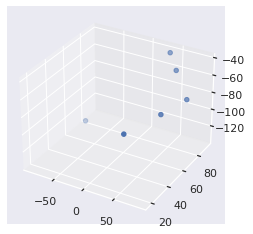

1


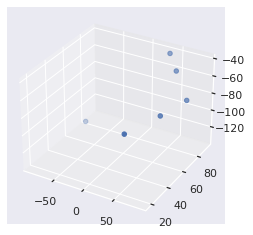

2


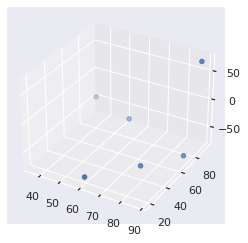

3


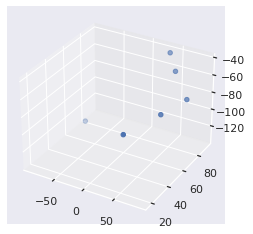

4


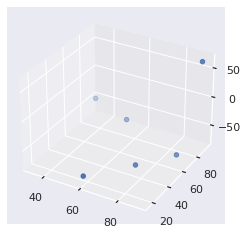

5


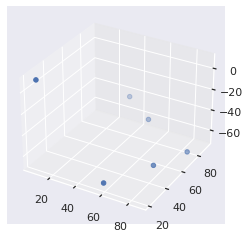

6


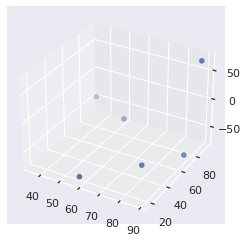

7


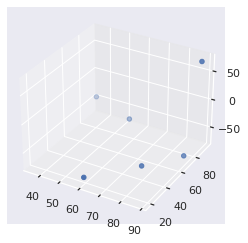

8


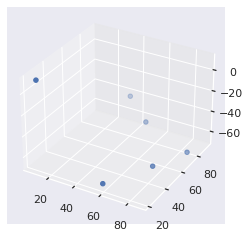

9


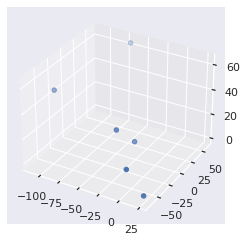

10


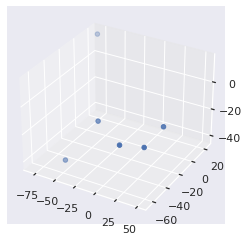

11


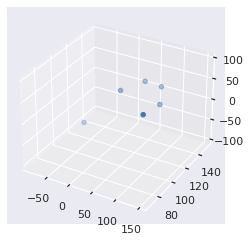

12


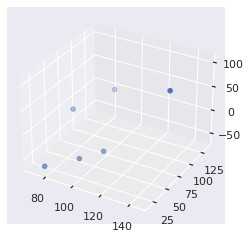

13


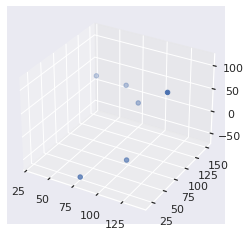

14


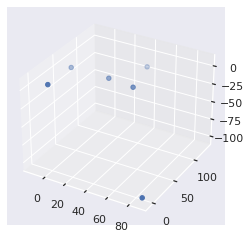

15


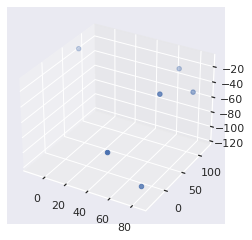

16


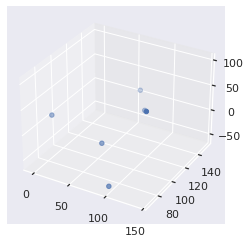

17


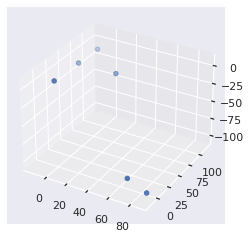

18


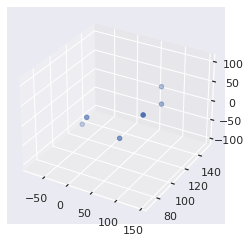

19


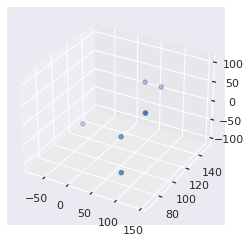

20


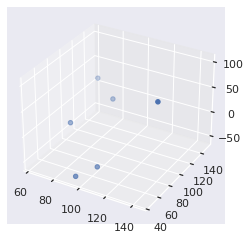

21


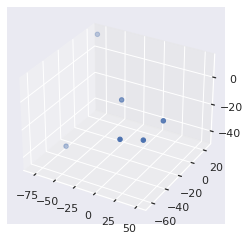

22


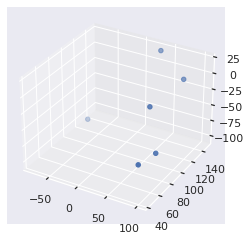

23


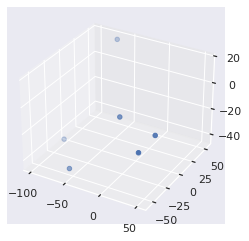

24


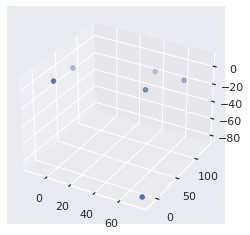

25


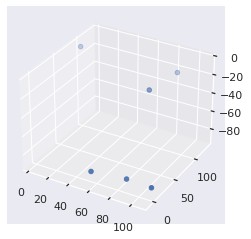

26


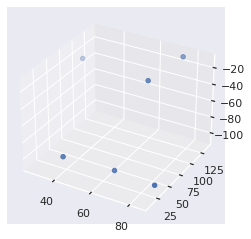

27


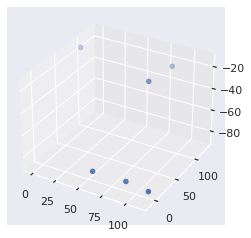

28


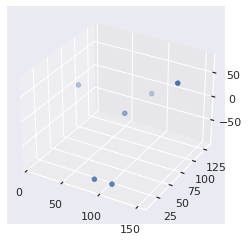

29


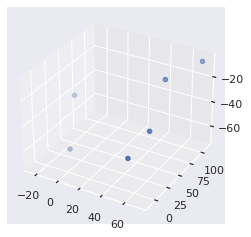

30


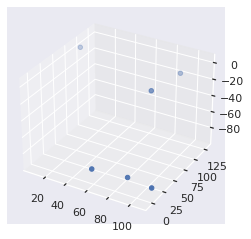

31


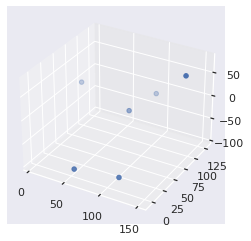

32


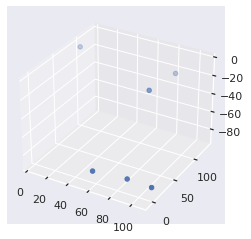

33


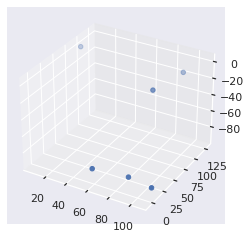

34


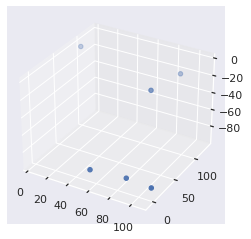

35


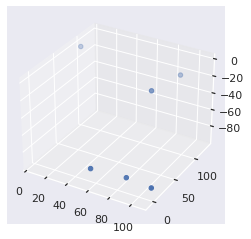

36


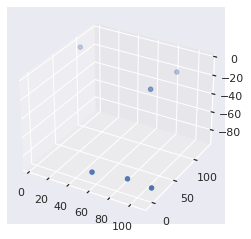

37


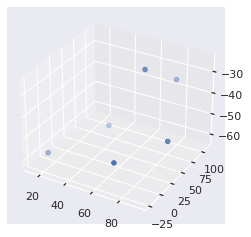

38


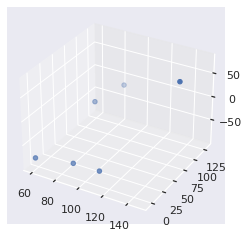

39


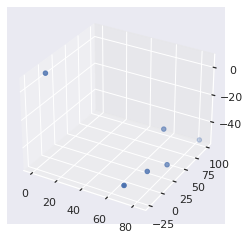

In [417]:
for i in range(40):
    print(i)
    plot_sample(outs.iloc[i,:])
